In [195]:
#Importing the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [159]:
#Load the Data
df = pd.read_csv(r"C:\Users\Khans\OneDrive\Desktop\dataframe_.csv")

In [160]:
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [161]:
df.shape

(1697, 2)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [163]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
input,1696.0,1.159933,79.005970,-134.962839,-63.386506,10.195194,70.264109,134.605775
output,1696.0,-34.088017,65.771112,-132.422167,-80.026767,-50.470981,-11.000000,134.425495


In [164]:
df.isnull().sum()

input     1
output    1
dtype: int64

In [165]:
df.dropna().head(2)

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929


In [166]:
df.duplicated().sum()

606

In [167]:
# Aggregate the duplicates by taking the mean of the columns
df = df.groupby(list(df.columns), as_index=False).mean()

In [168]:
df.duplicated().sum()
#after treating there is no duplicated values in our dataset

0

In [169]:
df.dtypes

input     float64
output    float64
dtype: object

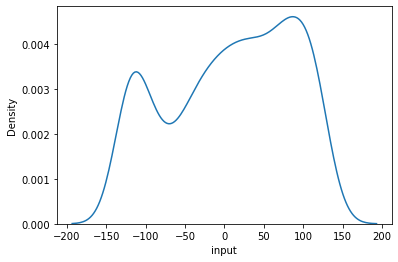

In [170]:
sns.kdeplot(df['input'])
plt.show()

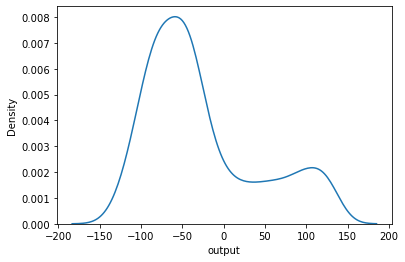

In [171]:
sns.kdeplot(df['output'])
plt.show()

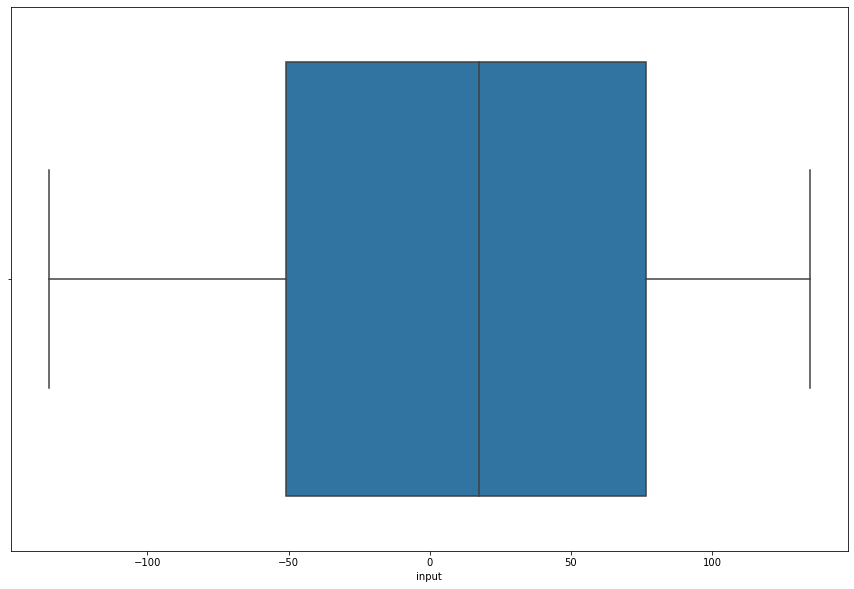

In [196]:
plt.figure(figsize=(15,10))
sns.boxplot(df['input'])
plt.show()

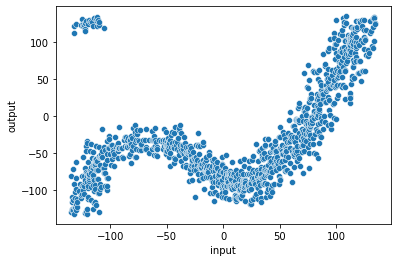

In [173]:

sns.scatterplot(x='input', y='output', data=df)
plt.show()

# Conclusion

From the Above Data Analysis we can conclude that we have only two colulmn in our Data set namely Input and Output. Output is our target feature(we have to predict).based on the datatype of target feature which is continuous we are sure that we are dealing with Regression Problem.
Data contain one null value in each column where we have deleted them. our data also contains 606 duplicate values this can cause the problem of data redundancy, to metigate this issue we have treated  by Aggregate the duplicates by taking the mean of the columns. Input columns does not contain outlier.
the input columns is not following normal distribution


In [197]:
from sklearn.model_selection import train_test_split
#deviding the datset into train & test data

In [201]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values
#seprating our feature and target columns

In [202]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [203]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

In [220]:
from sklearn.linear_model import LinearRegression

In [225]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)
#PREDICTING THE TEST RESULT
y_pred=regressor.predict(x_test)

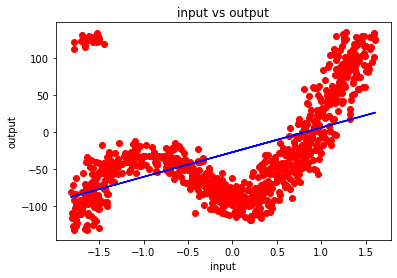

In [226]:
#visualizing the traing set result
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('input vs output')
plt.xlabel('input')
plt.ylabel('output')
plt.show()

In [227]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(r2)

3559.5774812946274
0.2848588680918219


In [228]:
#r_squared value (0.28) is very low this means that our line does not fit well so we have to apply other algorithm.

In [229]:
#checking performance of the model
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  46.69994149398874
Mean Squared Error:  3559.5774812946274
Root Mean Squared Error:  59.66219474084596


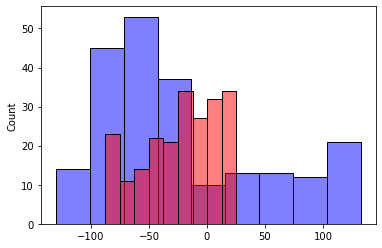

In [230]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_pred, color='red', alpha=0.5)
plt.show()

In [231]:
#KNN Regression
from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor()
regressor.fit(x_train,y_train)

KNeighborsRegressor()

In [232]:
y_pred=regressor.predict(x_test)

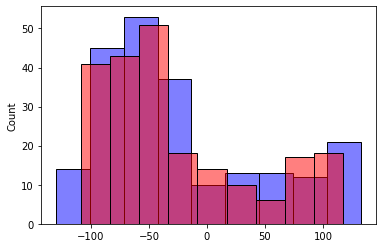

In [233]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_pred, color='red', alpha=0.5)
plt.show()

In [234]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  23.162354659447708
Mean Squared Error:  1586.5953420951146
Root Mean Squared Error:  39.83208935136487


In [235]:
#Decison Tree Regression
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [237]:
y_pred=regressor.predict(x_test)

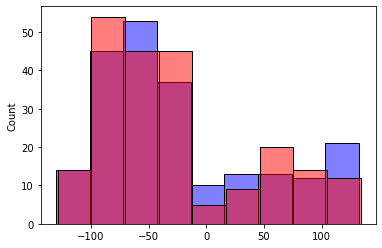

In [238]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_pred, color='red', alpha=0.5)
plt.show()

In [239]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  24.42384648430734
Mean Squared Error:  1695.076251105438
Root Mean Squared Error:  41.17130373337038


In [241]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [242]:
y_pred=regressor.predict(x_test)

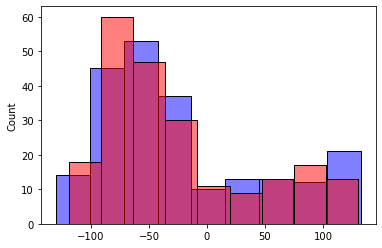

In [243]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_pred, color='red', alpha=0.5)
plt.show()

In [193]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error:  22.90406449780374
Mean Squared Error:  1468.4716805852922
Root Mean Squared Error:  38.320643008505115


In [244]:
#Rndom Forest is performing very well out of these 4 algorithm
# with the help of histplot we can clearly see that red color(predicted value) is trying to best overlap only in random forest where mean absolute error is least as compared to otger algorithm and MSE nad RMSE also lower.